### Task 1: Data Preparation
1. Load the dataset and display the first few rows.
2. Handle missing values appropriately.
3. Convert relevant columns to the correct data types (e.g., dates).
4. Create new columns if needed (e.g., total stay duration).

In [10]:
import pandas as pd
df = pd.read_csv("hotel_bookings.csv")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [16]:
df['company'].value_counts()

company
40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
18.0       1
273.0      1
368.0      1
393.0      1
132.0      1
Name: count, Length: 352, dtype: int64

In [17]:
df['company'] = df['company'].fillna(-1)
df['country'] = df['country'].fillna("noCountry")
df['children'] = df['children'].fillna(0)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [19]:
df.agent = df.agent.fillna(-1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [21]:
df['totalstay'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
df['anychildren'] = df['babies'] + df['children']

### Task 2: Unsupervised Learning with PCA and Clustering
1. **Objective**: Segment customers and reduce dimensionality for better visualization, focusing on bookings that were canceled.
2. **Steps**:
    - Select relevant features for clustering (e.g., `lead_time`, `adr`, `stays_in_weekend_nights`, `stays_in_week_nights`, `total_of_special_requests`).
    - Standardize the selected features.
    - Apply PCA to reduce dimensionality and inspect the loadings to distinguish between `City Hotel` and `Resort Hotel`.
    - Apply K-Means clustering to segment customers and plot the clusters on the PCA coordinates.
    - Evaluate the clustering using the silhouette score. You can use `silhouette_score` from `sklearn.metrics`.
    - Explore if the identified clusters have distinctive cancellation rates.

In [24]:
X = df[['lead_time','adr','stays_in_weekend_nights','stays_in_week_nights','total_of_special_requests']]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 5 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   lead_time                  119390 non-null  int64  
 1   adr                        119390 non-null  float64
 2   stays_in_weekend_nights    119390 non-null  int64  
 3   stays_in_week_nights       119390 non-null  int64  
 4   total_of_special_requests  119390 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 4.6 MB


In [25]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(X)
X_scaled = pd.DataFrame(df_scaled, columns=X.columns)

In [26]:
X_scaled

,lead_time,adr,stays_in_weekend_nights,stays_in_week_nights,total_of_special_requests
0,2.227051,-2.015038,-0.928890,-1.310240,-0.720694
1,5.923385,-2.015038,-0.928890,-1.310240,-0.720694
2,-0.907814,-0.530935,-0.928890,-0.786207,-0.720694
3,-0.851667,-0.530935,-0.928890,-0.786207,-0.720694
4,-0.842309,-0.075810,-0.928890,-0.262174,0.540666
...,...,...,...,...,...
119385,-0.758089,-0.112616,1.073895,1.309924,-0.720694
119386,-0.018822,2.445779,1.073895,1.309924,1.802026
119387,-0.655153,1.105733,1.073895,1.309924,4.324746
119388,0.046682,0.050833,1.073895,1.309924,-0.720694


In [27]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()

X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

In [28]:
X_pca

,PC1,PC2,PC3,PC4,PC5
0,-1.379905,-2.623592,0.937154,1.482209,-0.506484
1,-0.467876,-4.474465,3.716130,2.691774,-0.975099
2,-1.568182,-0.219944,-0.633414,-0.391505,0.210518
3,-1.554329,-0.248059,-0.591202,-0.373132,0.203400
4,-0.915051,0.766882,-0.347991,0.301684,0.549170
...,...,...,...,...,...
119385,1.263656,-0.276304,-1.140172,-0.949689,0.317584
119386,2.268444,2.446430,0.959849,-0.190892,0.100150
119387,2.326738,3.559707,-0.207527,2.247880,0.207842
119388,1.487678,-0.582920,-0.441499,-0.775649,0.209237


In [29]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5
lead_time,0.246739,-0.500732,0.751820,0.327234,-0.126778
adr,0.155724,0.589534,0.572843,-0.546402,-0.038664
stays_in_weekend_nights,0.655752,-0.031938,-0.301312,-0.115216,-0.681840
stays_in_week_nights,0.675732,-0.078256,-0.121888,-0.070537,0.719326
total_of_special_requests,0.168064,0.628150,0.031183,0.759021,-0.009828


In [32]:
X_pca['hotel'] = df['hotel']
X_pca.groupby('hotel').mean()

,PC1,PC2,PC3,PC4,PC5
hotel,,,,,
City Hotel,-0.180587,0.011577,0.138906,-0.016421,-0.038358
Resort Hotel,0.357613,-0.022926,-0.275073,0.032519,0.075959


In [44]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
X_pca["Cluster"] = kmeans.fit_predict(X_pca[['PC1','PC2','PC3','PC4','PC5']])
X_pca["Cluster"] = X_pca["Cluster"].astype("category")

In [40]:
X_pca

,PC1,PC2,PC3,PC4,PC5,hotel,Cluster
0,-1.379905,-2.623592,0.937154,1.482209,-0.506484,Resort Hotel,3
1,-0.467876,-4.474465,3.716130,2.691774,-0.975099,Resort Hotel,3
2,-1.568182,-0.219944,-0.633414,-0.391505,0.210518,Resort Hotel,4
3,-1.554329,-0.248059,-0.591202,-0.373132,0.203400,Resort Hotel,4
4,-0.915051,0.766882,-0.347991,0.301684,0.549170,Resort Hotel,0
...,...,...,...,...,...,...,...
119385,1.263656,-0.276304,-1.140172,-0.949689,0.317584,City Hotel,1
119386,2.268444,2.446430,0.959849,-0.190892,0.100150,City Hotel,2
119387,2.326738,3.559707,-0.207527,2.247880,0.207842,City Hotel,0
119388,1.487678,-0.582920,-0.441499,-0.775649,0.209237,City Hotel,1


<Axes: xlabel='PC1', ylabel='PC2'>

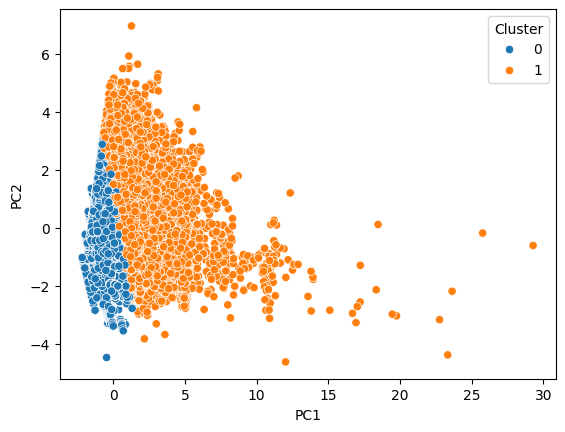

In [45]:
import seaborn as sns
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data = X_pca[X_pca['PC2']<40])

In [46]:
from sklearn.metrics import silhouette_score

In [48]:
silhouette_score(X_pca[['PC1','PC2','PC3','PC4','PC5']],X_pca['Cluster'],sample_size=5000)

np.float64(0.23987565674560019)

In [51]:
for ncluster in range (2,8):
    kmeans = KMeans(n_clusters=ncluster)
    X_pca["Cluster"] = kmeans.fit_predict(X_pca[['PC1','PC2','PC3','PC4','PC5']])
    X_pca["Cluster"] = X_pca["Cluster"].astype("category")
    print(ncluster, " : ", silhouette_score(X_pca[['PC1','PC2','PC3','PC4','PC5']],X_pca['Cluster'],sample_size=10000))

2  :  0.22542189539181204
3  :  0.1969258119319065
4  :  0.23120920855756402
5  :  0.23989745460652376
6  :  0.21730896278627068
7  :  0.21528226318403673


In [52]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
X_pca["Cluster"] = kmeans.fit_predict(X_pca[['PC1','PC2','PC3','PC4','PC5']])
X_pca["Cluster"] = X_pca["Cluster"].astype("category")

### Task 3: Supervised Learning with Pipelining Predictions
1. **Objective**: Predict whether a booking will be canceled or not.
2. **Steps**:
    - Define the target variable (`is_canceled`) and features.
    - Clusters from task 2 are also candidates for categorical features.
    - Other engineered feature suggestions include: share of weekday nights, family booking indicating 2 adults plus at least one kid, grouping the origin countries
    - Split the dataset into training and test sets.
    - Create a preprocessing pipeline using `ColumnTransformer` to handle numerical and categorical features, including PCA components.
    - Use a `Pipeline` to streamline preprocessing and model training.
    - Train multiple classification models (e.g., `LogisticRegression`, `RandomForestClassifier`) and evaluate its performance.
    - For tree-based models report and comment on the feature importance.

In [53]:
df['Cluster'] = X_pca['Cluster']

In [54]:
y = df['is_canceled']

In [57]:
df.drop('reservation_status',axis=1,inplace=True)
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status_date', 'totalstay', 'anychildren', 'Cluster'],
      dtype='object')

In [58]:
df.drop('reservation_status_date',axis=1,inplace=True)

In [77]:
df.drop('is_canceled',axis=1,inplace=True)

In [78]:
X=df

In [90]:
X.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,...,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,totalstay,anychildren
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,...,0,3,-1.0,-1.0,0,0.0,0,0,0,0.0
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,...,0,4,-1.0,-1.0,0,0.0,0,0,0,0.0
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,...,0,0,-1.0,-1.0,0,75.0,0,0,1,0.0
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,...,0,0,304.0,-1.0,0,75.0,0,0,1,0.0
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,...,0,0,240.0,-1.0,0,98.0,0,1,2,0.0


In [92]:
y.mean()

np.float64(0.37041628277075134)

In [93]:
from sklearn.preprocessing import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64', 'bool']]
categorical_cols = [cname for cname in X.columns if X[cname].dtype in ["object","category"]]



len(numerical_cols+categorical_cols)

32

In [103]:
X = X[categorical_cols + numerical_cols]

numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing categorical columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle both preprocessors
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_cols),
    ('num', numerical_transformer, numerical_cols)
])

from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)
X_train.head()

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

model_rf_classifier = RandomForestClassifier(random_state=1, n_estimators=10, max_features="log2")

# Bundle preprocessing and modeling code in a pipeline
complete_pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model_rf_classifier)
])

# Preprocess the raw training data and fit the model
complete_pipeline_rf.fit(X_train, y_train)

# Preprocess the raw validation data and make predictions
preds = complete_pipeline_rf.predict(X_valid)

# Evaluate the model
score = accuracy_score(y_valid, preds)
print("Accuracy using the complete random forest pipeline: {}".format(score))

Accuracy using the complete random forest pipeline: 0.8766228327330597


In [104]:
complete_pipeline_rf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['hotel',
                                                   'arrival_date_month', 'meal',
                                                   'country', 'market_segment',
                                                   'distribution_channel',
                                                   'reserved_room_type',
                                                   'assigned_room_type',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'Cluster']),
                                                 ('num',
                                                  SimpleImputer(strategy='median')...
                                                   'stays_in_week_nights',
                                                   'adults', 'children',
                                                   'babies',
                                                   'is_repeated_guest',
                                                   'previous_cancellations',
                                                   'previous_bookings_not_canceled',
                                                   'booking_changes', 'agent',
                                                   'company',
                                                   'days_in_waiting_list',
                                                   'adr',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests',
                                                   'totalstay',
                                                   'anychildren'])])),
                ('model',
                 RandomForestClassifier(max_features='log2', n_estimators=10,
                                        random_state=1))])

In [105]:
feat_importances = pd.Series(complete_pipeline_rf.steps[1][1].feature_importances_)

In [106]:
feat_importances

0      0.005704
1      0.008057
2      0.004831
3      0.006118
4      0.003158
         ...   
253    0.062459
254    0.015124
255    0.037845
256    0.029143
257    0.004665
Length: 258, dtype: float64

In [107]:
len(categorical_cols)

11

In [108]:
len(numerical_cols)

21

In [109]:
onehot_columns = complete_pipeline_rf.named_steps['preprocessor'].named_transformers_['cat'][0].get_feature_names_out(categorical_cols)

In [110]:
len(onehot_columns)

237

In [111]:
labels = list(X_train.columns[len(categorical_cols):])+list(onehot_columns)
len(labels)


258

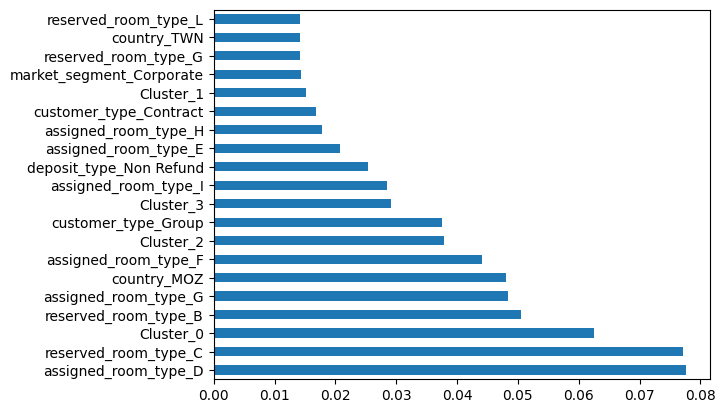

In [113]:
feat_importances.index = list(X_train.columns[len(categorical_cols):])+list(onehot_columns)
feat_importances.nlargest(20).plot(kind='barh');

### Task 4: Time Series Analysis
1. **Objective**: Forecast the average daily rate (ADR) over time.
2. **Steps**:
    - Convert the `reservation_status_date` to a datetime object and set it as the index.
    - Resample the data to a monthly frequency, calculating the mean ADR for each month. This is easily done by using '.resample('M').mean()'
    - Split the time series data into training and test sets.
    - Create a pipeline using `sktime` for time series forecasting.
    - Train a time series forecasting model (e.g., `ARIMA`, `ExponentialSmoothing`) and evaluate its performance.



In [138]:
# Create a single timestamp column
df['date'] = df['arrival_date_day_of_month'].astype(str) + ' ' + df['arrival_date_month'] + ' ' + df['arrival_date_year'].astype(str)

df['date'] = pd.to_datetime(df['date'])

In [139]:
y = df[['date','adr']]

y.set_index('date', inplace=True)

In [140]:
y

,adr
date,
2015-07-01,0.00
2015-07-01,0.00
2015-07-01,75.00
2015-07-01,75.00
2015-07-01,98.00
...,...
2017-08-30,96.14
2017-08-31,225.43
2017-08-31,157.71


In [141]:
y = y.resample('ME')['adr'].mean()

In [142]:
y

date
2015-07-31     97.834316
2015-08-31    105.922888
2015-09-30     94.818662
2015-10-31     78.895427
2015-11-30     60.580252
2015-12-31     74.079243
2016-01-31     64.767656
2016-02-29     70.102269
2016-03-31     79.069326
2016-04-30     88.918920
2016-05-31     96.399286
2016-06-30    106.977315
2016-07-31    125.484536
2016-08-31    142.893595
2016-09-30    114.749566
2016-10-31     95.111794
2016-11-30     80.737580
2016-12-31     86.370246
2017-01-31     73.777264
2017-02-28     76.824005
2017-03-31     82.242660
2017-04-30    111.370903
2017-05-31    119.365364
2017-06-30    125.757599
2017-07-31    143.037770
2017-08-31    164.248370
Freq: ME, Name: adr, dtype: float64

In [126]:
!pip install sktime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 20.8 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.1/134.1 kB 4.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [143]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.base import ForecastingHorizon

naive_forecaster = NaiveForecaster(sp=12)
naive_forecaster.fit(y)
sktime_fh = ForecastingHorizon(range(-12,12), is_relative=True)
y_pred_naive = naive_forecaster.predict(fh=sktime_fh)

In [144]:
y_pred_naive

2016-08-31    105.922888
2016-09-30     94.818662
2016-10-31     78.895427
2016-11-30     60.580252
2016-12-31     74.079243
2017-01-31     64.767656
2017-02-28     70.102269
2017-03-31     79.069326
2017-04-30     88.918920
2017-05-31     96.399286
2017-06-30    106.977315
2017-07-31    125.484536
2017-08-31    142.893595
2017-09-30    114.749566
2017-10-31     95.111794
2017-11-30     80.737580
2017-12-31     86.370246
2018-01-31     73.777264
2018-02-28     76.824005
2018-03-31     82.242660
2018-04-30    111.370903
2018-05-31    119.365364
2018-06-30    125.757599
2018-07-31    143.037770
Freq: ME, Name: adr, dtype: float64

In [131]:
prediction_data = pd.DataFrame({'naive':y_pred_naive})
prediction_data
evaluationData = pd.merge(y,prediction_data,how="inner", left_index=True, right_index=True)
evaluationData

,adr,naive
2016-08-31,142.893595,105.922888
2016-09-30,114.749566,94.818662
2016-10-31,95.111794,78.895427
2016-11-30,80.737580,60.580252
2016-12-31,86.370246,74.079243
2017-01-31,73.777264,64.767656
2017-02-28,76.824005,70.102269
2017-03-31,82.242660,79.069326
2017-04-30,111.370903,88.918920
2017-05-31,119.365364,96.399286


In [150]:
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError, MeanAbsoluteError
mape = MeanAbsolutePercentageError(symmetric=False)
mape(evaluationData['adr'],evaluationData['naive'])

/usr/local/python/3.10.13/lib/python3.10/site-packages/sktime/performance_metrics/forecasting/_classes.py:615: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(


np.float64(0.1568580898228666)

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='adr'>)

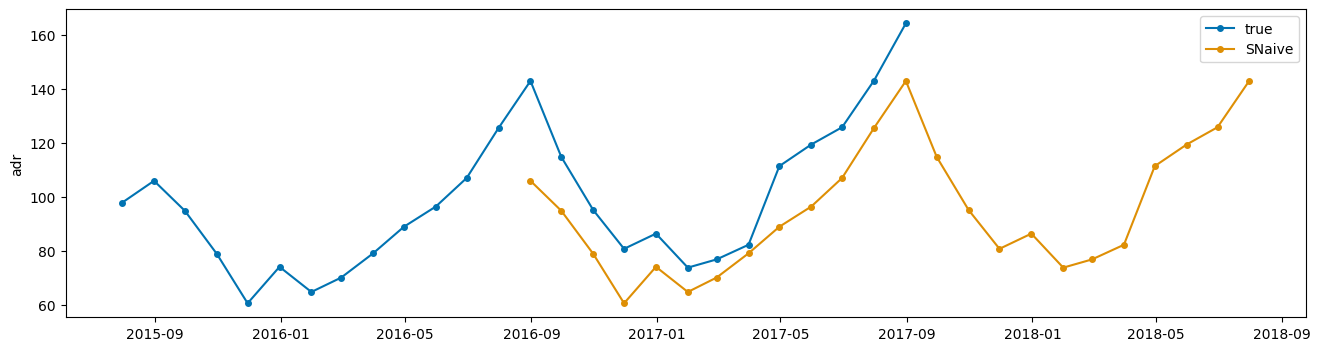

In [145]:
from sktime.utils.plotting import plot_series
plot_series(y, y_pred_naive, labels=['true','SNaive'])

## Additional Tips
- Use `SimpleImputer` for handling missing values and `StandardScaler` for standardization.
- Experiment with different models and hyperparameters to improve performance.
- Use `train_test_split` from `sklearn.model_selection` to split the data.
- Visualize the results where possible.
